In [1]:
%load_ext autoreload
%autoreload 2

import sys  
sys.path.insert(0, 'functions')
sys.path.insert(0, 'training')

#from Clusterer import *
from plotting import *
from data_functions import *
import pandas as pd
import numpy as np
import compress_pickle as pickle  

time_TH=150
MIP=0.0006 ## GeV
MIP_TH=0.5 * MIP

/home/bishnu/miniconda3/envs/use_tensorflow/lib/python3.10/site-packages/awkward0/__init__.py:8: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if distutils.version.LooseVersion(numpy.__version__) < distutils.version.LooseVersion("1.13.1"):
2023-06-01 23:36:36.713102: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-01 23:36:37.306809: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/bishnu/Library/root/lib:/usr/local/lib:/usr/local/lib:/usr/local/cuda-11.8/lib64
2023-06-01 23:36:37.30686

## Path where the training model and prediction files are

In [39]:
print('hello')
take_log10 = False
path_to_result_dir='/media/miguel/Elements/Data_hcali/Data1/log10_Uniform_03-23/DeepSets_output'

hello


In [40]:
## Number of block =1, num layers =8, latent size = 128 E,x, Y,Z + label "0" ECAL and "1" for HCAL 
#as input ECAL + HCAL 
block_with_label_same_ecal_hcal_cut='results_hcal_ecal_with_label/Block_20230513_1315_concatTrue' 

## This is with label correct ecal cuts as before ecal cuts were not considering that ECAL is in GEV
block_with_label_with_right_cut='results_with_label_Ecal_hcal_right_cut/Block_20230520_2124_concatTrue'


## Number of block =1, num layers =4, latent size = 64 E,x, Y,Z as input ECAL + HCAL 
block_64_4='results_ecal_hcal_all/Block_20230511_2334_concatTrue' ## L4 and Size 64


## Number of block =1, num layers =8, latent size = 128 E,x, Y,Z as input ECAL + HCAL 
block_128_8='results_ecal_hcal_all_size128_L8/Block_20230512_0738_concatTrue'


## Number of block =2, num layers =8, latent size = 128 E,x, Y,Z as input ECAL + HCAL 
block_2_128_8='results_ecal_hcal_all_size128_L8_block2/Block_20230512_1147_concatTrue'


## Read mean and standard deviation for prediction
## Or convert normalized output back to orginal data structure
## Set block = some setting from above for now I am analyzing the training with label "0" and "1" assigned to ECAL and HCAL hits respectively

In [27]:
block = block_with_label


In [28]:
#mean_std_data='preprocessed_data_ecal_hcal_all'

## This is with the appropriate ECAL cut considering the right unit of ecal
mean_std_data='preprocessed_data_hcal_ecal_right_ecal_cut'

#mean_std_data='preprocessed_data_with_label'
means = pickle.load(open(f"{path_to_result_dir}/{mean_std_data}/test/means.p", 'rb'), compression='gzip')
stdvs = pickle.load(open(f"{path_to_result_dir}/{mean_std_data}/test/stdvs.p", 'rb'), compression='gzip')
means.keys()


npz_unpacked = np.load(path_to_result_dir + "/" + block + "/test_predictions.npz")

predictions = npz_unpacked['outputs']
targets = npz_unpacked['targets']


means.keys()
#Undo log: Exponentiate
#Averages and STdevs taken AFTER log10 taken. So undo scalar, then exp.
#scalar = (x-mean)/stdev
#undo_scalar = x'*stdev + mean

predictions = predictions*stdvs['genP'] + means['genP']
targets = targets*stdvs['genP'] + means['genP']

predictions = 10**predictions
targets = 10**targets


ClusterSum = predictions
GenP = targets

## Plot predicted (deep sets)  vs generated energy 

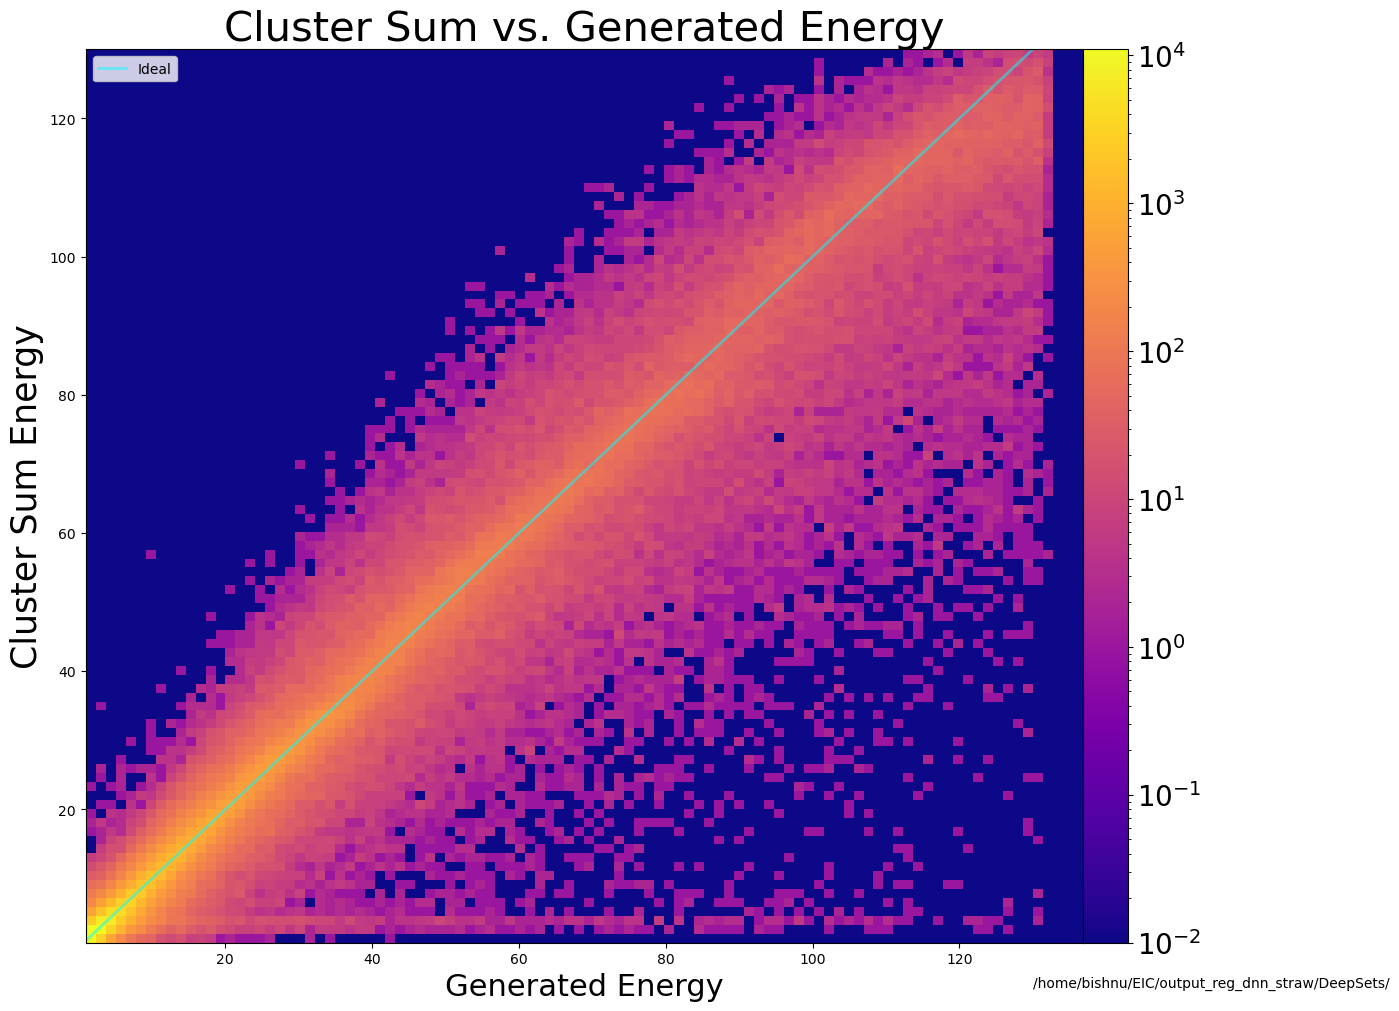

In [29]:
output_path='/home/bishnu/EIC/output_reg_dnn_straw/DeepSets/'
ClusterSum_vs_GenP(ClusterSum, GenP, output_path, take_log10)

## Compare the loss curves with different setting 


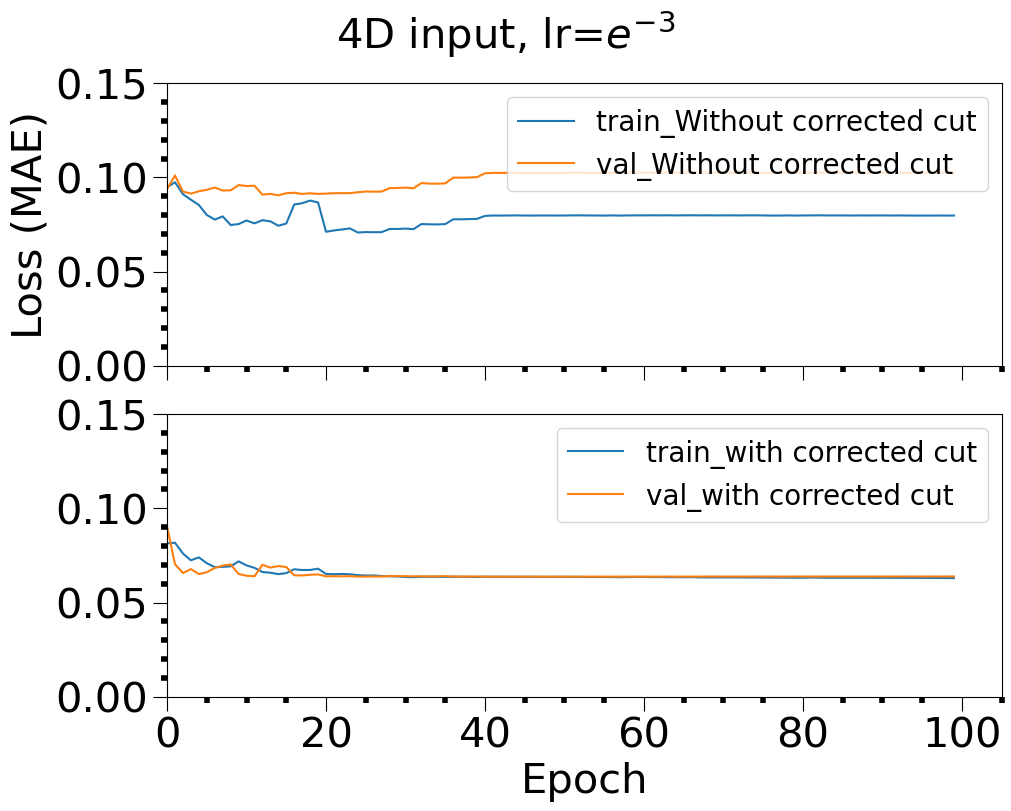

In [43]:
'''
npz_unpacked_loss = np.load(path_to_result_dir  +'/'+ block + "/losses.npz")
loss = npz_unpacked_loss['training']
val_loss = npz_unpacked_loss['validation']
'''
#Plot_Loss_Curve(loss[:,-1],val_loss[:,-1],output_path,loss_string="MSE") #label loss yourself here


result_paths=[path_to_result_dir  +'/'+ block_with_label_same_ecal_hcal_cut,   
              path_to_result_dir  +'/'+ block_with_label_with_right_cut]#,
             #path_to_result_dir  +'/'+ block_2_128_8]  #path_to_result_dir  +'/'+ block_128_8,


title="4D input, lr=$e^{-3}$"

legend_name=['Without corrected cut',  'with corrected cut'] # '2 blocks''Latent size 128'
xlim=[0, 105]
ylim=[0., 0.15]    
compare_loss_plots(result_paths, legend_name, title, 'pi+', xlim, ylim) 

## Deep set predicted Energy distribution

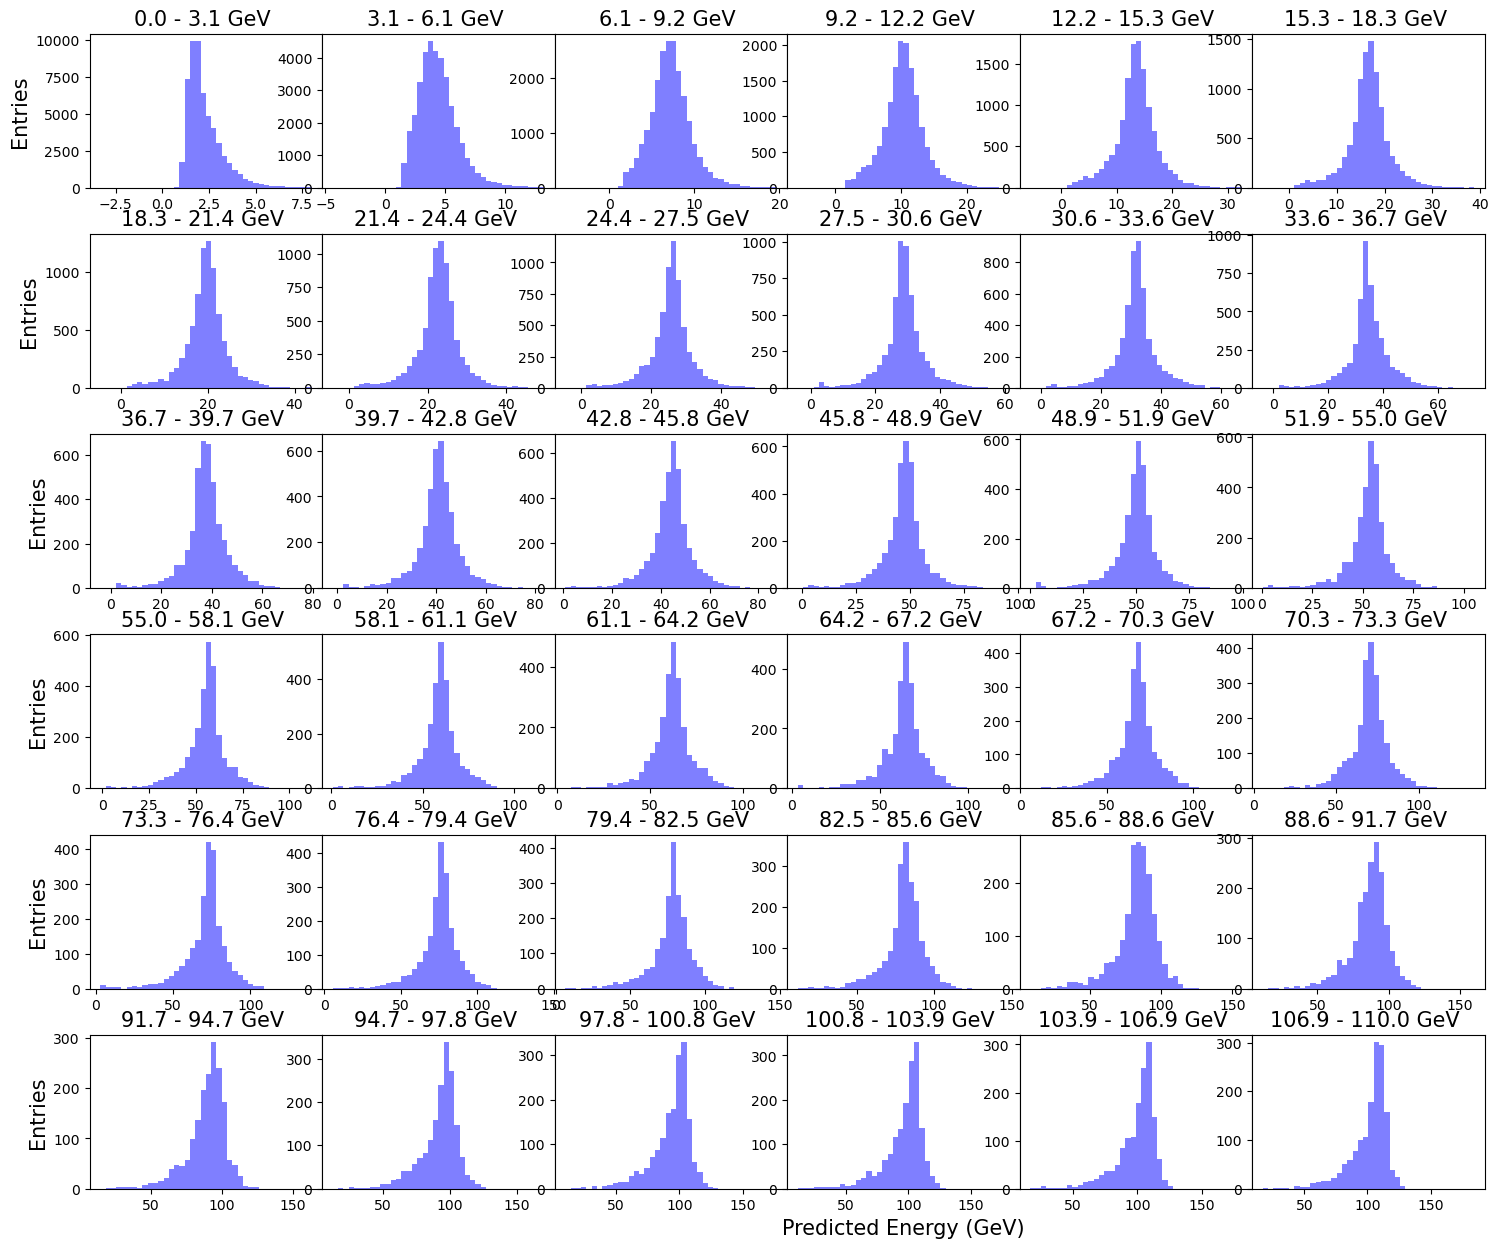

In [31]:
## Number of bins in given true energy bins
nbins=40

## Minimum and maximum value for the plots
min_val=0
max_val=110

## Numbers of segments we want to break the continuous generated true energy
Nbins=37
particle='pp'
data_type='continuous'

## CHOOSE A OPTION TO FIT OR NOT
fit_dist=False
binning=np.linspace(min_val, max_val, Nbins)
resolution_fit, pred_over_truth_fit, true_fit,slices_fit,resolution_scale_corr_median, median_scale_fit,slices_pred_truth,\
    res_std_median, res_sigma_median =get_res_scale_fit_log10_log2(GenP,ClusterSum, binning, nbins, data_type, particle,'energy', fit_dist)
                                                                   

## SAVE THE SLICES IN CSV FILE
## SAVE SLICES AND PREDICTION/TRUE

In [75]:
output_path='/home/bishnu/EIC/output_reg_dnn_straw/DeepSets/'
particle='pp'
detector='hcal'
particle_detector=f'{particle}_{detector}'
df = pd.DataFrame(slices_fit)
df.to_csv(f'{output_path}Ecal_hcal_pred_DeepSets_{particle_detector}_with_label_correct_ecal_cut.csv', index=False)  
#df_straw_truth = pd.DataFrame(slices_truth)
#df.to_csv(f'{output_path}/true_{approach}_{particle_detector}.csv', index=False)

## Pred over Truth
df_straw_truth = pd.DataFrame(slices_pred_truth)
df_straw_truth.to_csv(f'{output_path}Ecal_hcal_pred_true_DeepSets_{particle_detector}_with_label_correct_ecal_cut.csv', index=False)


## Strawman distribution on HCAL 

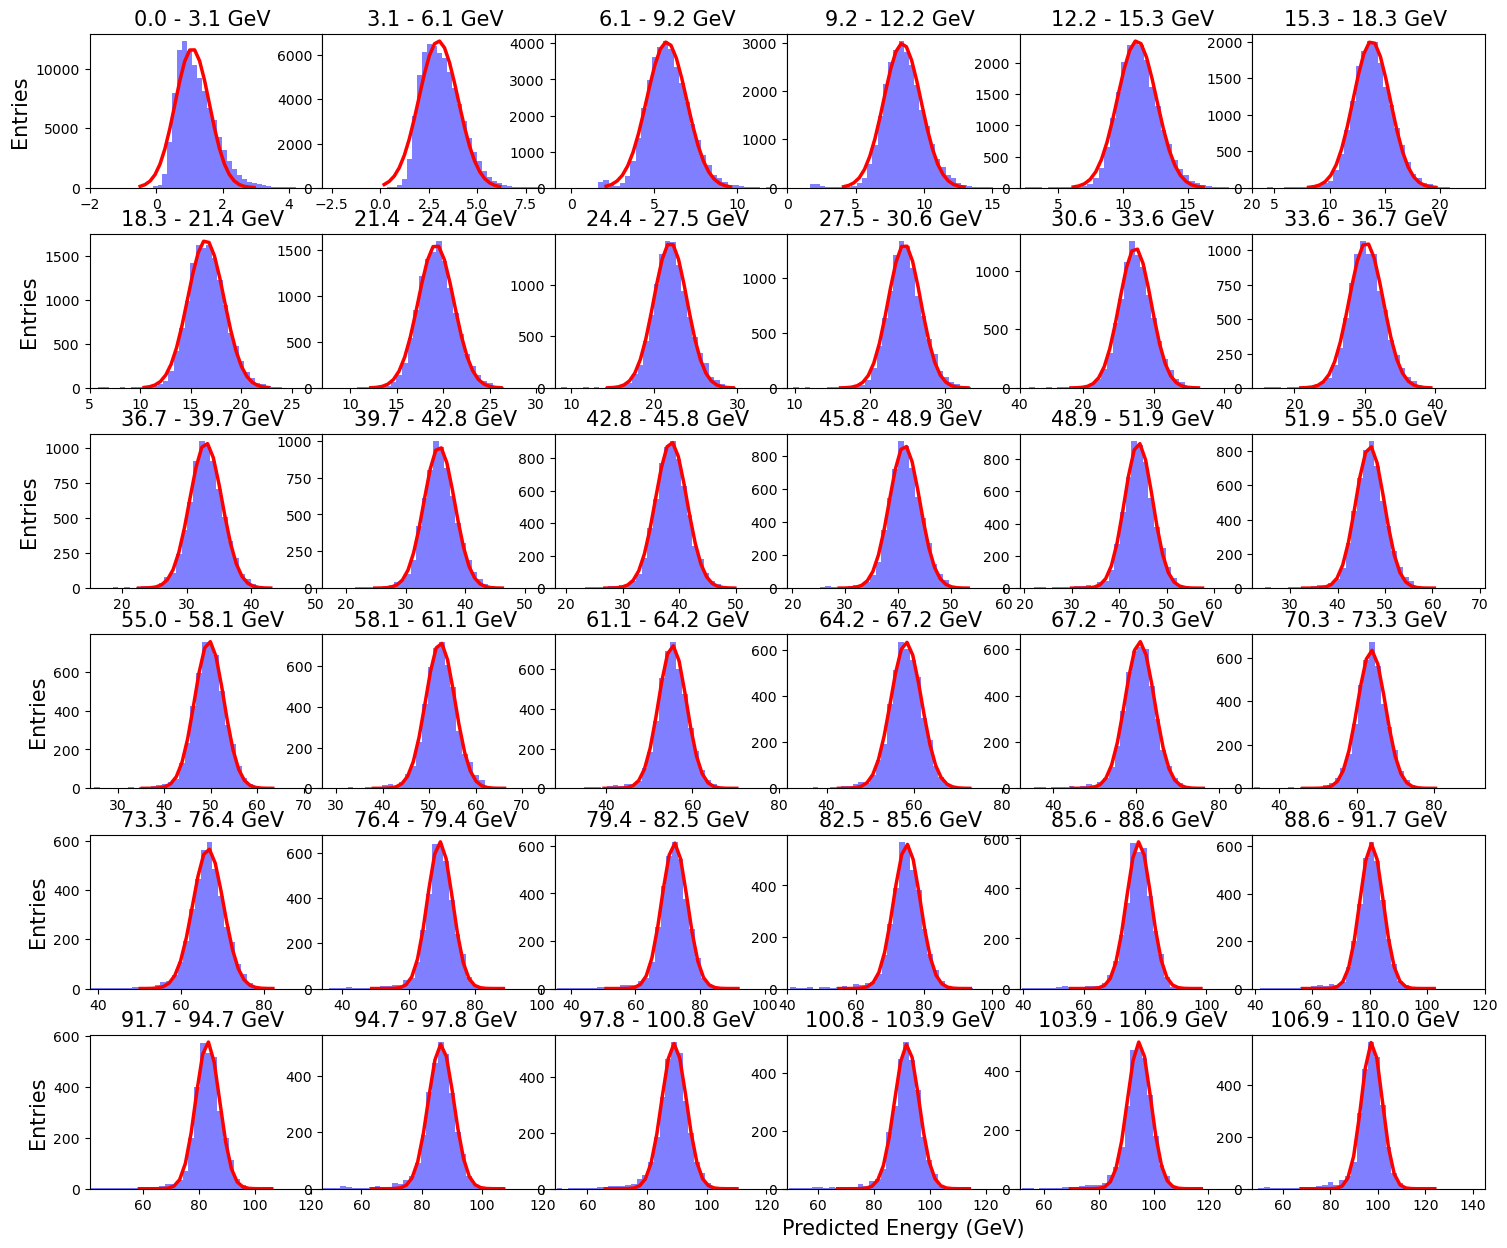

In [77]:
## ROOT FILE PATH FOR THE ECAL + HCAL DATA
path='/media/miguel/Elements/Data_hcali/Data1/log10_Uniform_03-23/log10_pi+_100_10k_17deg_ECAL_1/'

#log10_pi+_100_10k_2.83deg_ECAL_1/'
#path='/media/miguel/Elements/Data_hcali/Data1/log10_Uniform_03-23/log10_pi+_Uniform_0-140Gev_17deg_1/'

## NUMBER OF BINS IN EACH SLICES OF ENERGY
nbins=40

hadronic_detector='hcal'
data_type='continuous'
ecal_hcal_both=True  ## if you want both ecal and hcal
particle='pp'
min_val=0
max_val=110

## NUMBER OF ENERGY BINS YOU WANT TO DIVIDE FOR GENERATED CONTINUOUS TRUE ENERGY
Nbins=37


## OPTION TO FIT OR NOT TO FIT THE OUTPUT DISTRIBUTION
fit_dist=True
binning=np.linspace(min_val, max_val, Nbins)

## ARGUMENTS ARE PATH OF FILE 'path', analyze files between "0" to '10' or first 10 files
gen_energy,theta, hcal_sum, ecal_sum, total_sum =read_root_files_chain(path, hadronic_detector, 0, 60,  ecal_hcal_both)



## STRAWMAN reconstruction = ECAL/SF + HCAL/SF (SF is samping fraction)
resolution_fit, pred_over_truth_fit, true_fit,slices_fit,resolution_scale_corr_median, median_scale_fit,slices_pred_truth,\
    res_std_median, res_sigma_median =get_res_scale_fit_log10_log2(gen_energy, total_sum,  binning, nbins, data_type, 
                                                                   particle,'energy', fit_dist)
                                                             
                                                                   

## Save the slices distribution of predicted energy into csv file for later use

In [78]:
detector='ecal_hcal'
name_tag='straw_'
particle_detector=f'{particle}_{detector}_ecal_{data_type}'
print_parameter(true_fit, name_tag +'energy',particle_detector ) 
print_parameter(resolution_scale_corr_median, name_tag+'res_cor',particle_detector  ) ## std over median
#print_parameter(resolution_fit, name_tag +'res_fit', particle_detector ) ## sigma over mean fit 

#print_parameter(res_sigma_median, name_tag +'res_sigma', particle_detector ) 
#print_parameter(res_std_median, name_tag +'res_std_median', particle_detector ) 
#print_parameter(res_sigma_median, name_tag +'res_sigma_median', particle_detector )
print_parameter(median_scale_fit, name_tag +'scale_median', particle_detector )





'''
particle_detector=f'{particle}_{detector}'
df = pd.DataFrame(slices_fit)
df.to_csv(f'{output_path}Ecal_hcal_pred_strawman_{particle_detector}_60Files.csv', index=False)  
#df_straw_truth = pd.DataFrame(slices_truth)
#df.to_csv(f'{output_path}/true_{approach}_{particle_detector}.csv', index=False)

## Pred over Truth
df_straw_truth = pd.DataFrame(slices_pred_truth)
df_straw_truth.to_csv(f'{output_path}Ecal_hcal_pred_true_strawman_{particle_detector}_60Files.csv', index=False)
'''


straw_energy_pp_ecal_hcal_ecal_continuous=np. array([  1.844609,   4.412021,   7.528976,  10.625408,  13.687117,
        16.759927,  19.814245,  22.865855,  25.948835,  29.006383,
        32.047454,  35.127902,  38.180938,  41.225599,  44.30032 ,
        47.341405,  50.384792,  53.452816,  56.526109,  59.58208 ,
        62.639818,  65.64946 ,  68.720876,  71.807799,  74.878838,
        77.901991,  80.995899,  84.037431,  87.077373,  90.131782,
        93.194694,  96.233631,  99.309676, 102.322214, 105.408465,
       108.469014])
straw_res_cor_pp_ecal_hcal_ecal_continuous=np. array([0.506073, 0.335455, 0.225271, 0.181171, 0.157383, 0.144528,
       0.129619, 0.126595, 0.119807, 0.119827, 0.114777, 0.106323,
       0.108002, 0.104432, 0.103474, 0.103056, 0.109116, 0.103133,
       0.098408, 0.093631, 0.097055, 0.089815, 0.090935, 0.093587,
       0.083558, 0.099455, 0.098694, 0.089263, 0.095401, 0.098948,
       0.09901 , 0.088094, 0.086451, 0.089521, 0.088115, 0.100688])
straw_scale_med

## Compare the slices between Deep sets and strawman
## The distribution is (E_pred - E_true) / E_true

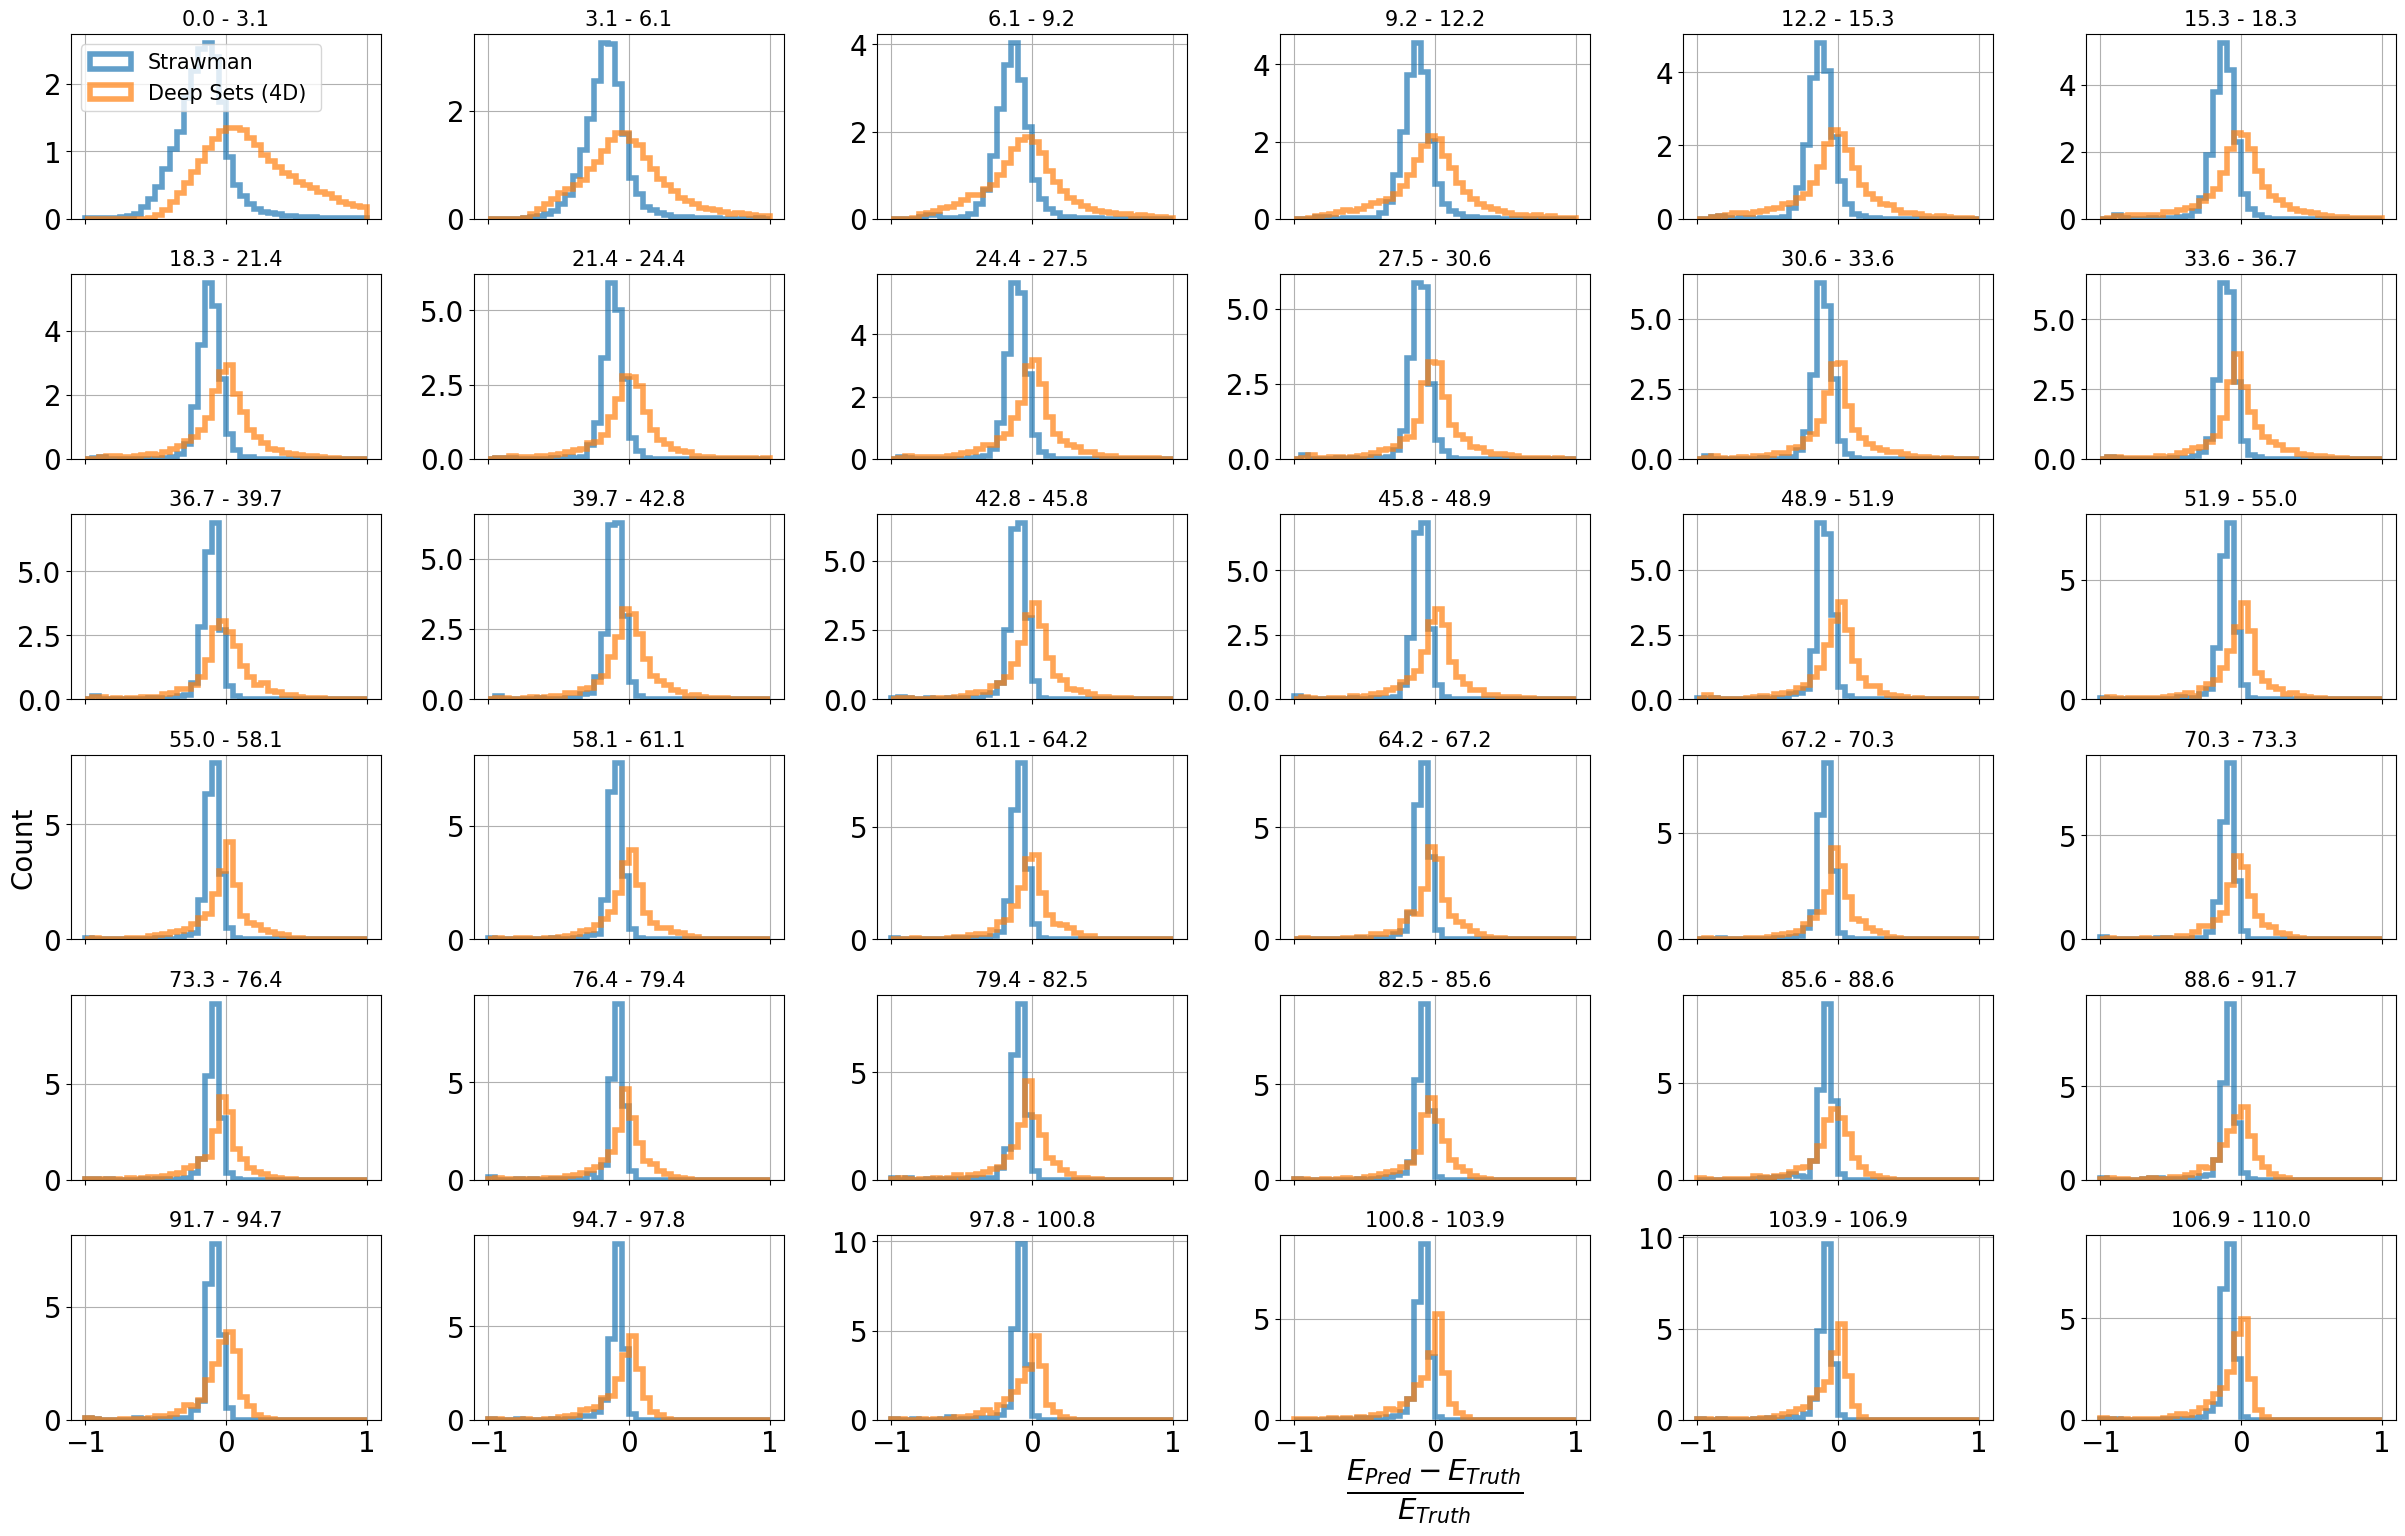

In [36]:
#output_path='/home/bishnu/EIC/output_reg_dnn_straw/DeepSets'
output_path='/home/bishnu/EIC/output_reg_dnn_straw/DeepSets/'

particle='pp'
detector='hcal'
approach=["DeepSets"]*4 #+ ['strawman']*1
#labels=['4D (ECAL + HCAL)'  , 'strawman']#, '2D', '3D', '4D', 'strawman']      ## Input features
labels=['Strawman','Deep Sets (4D) ']
data_type='continuous'
files_pred_true=[f'{output_path}Ecal_hcal_pred_true_strawman_{particle}_{detector}.csv',
            f'{output_path}Ecal_hcal_pred_true_DeepSets_{particle}_{detector}_with_label_correct_ecal_cut.csv']
                 #f'{output_path}Ecal_hcal_pred_true_DeepSets_{particle}_{detector}_without_label.csv',]
                 
                #
#Ecal_hcal_pred_true_DeepSets_{particle_detector}.csv
#f'{output_path}Ecal_hcal_pred_true_DeepSets_{particle}_{detector}.csv'
    
nbins=40
min_val=0
max_val=110
Nbins=37
binning=np.linspace(min_val, max_val, Nbins)


compare_energy_response_E_over_pred(files_pred_true, binning, data_type,particle,detector, 
                                    labels,ratio_E_pred=True, ylogscale=False)

## Compare the slices between Deep sets and strawman
## The distribution is E_pred 

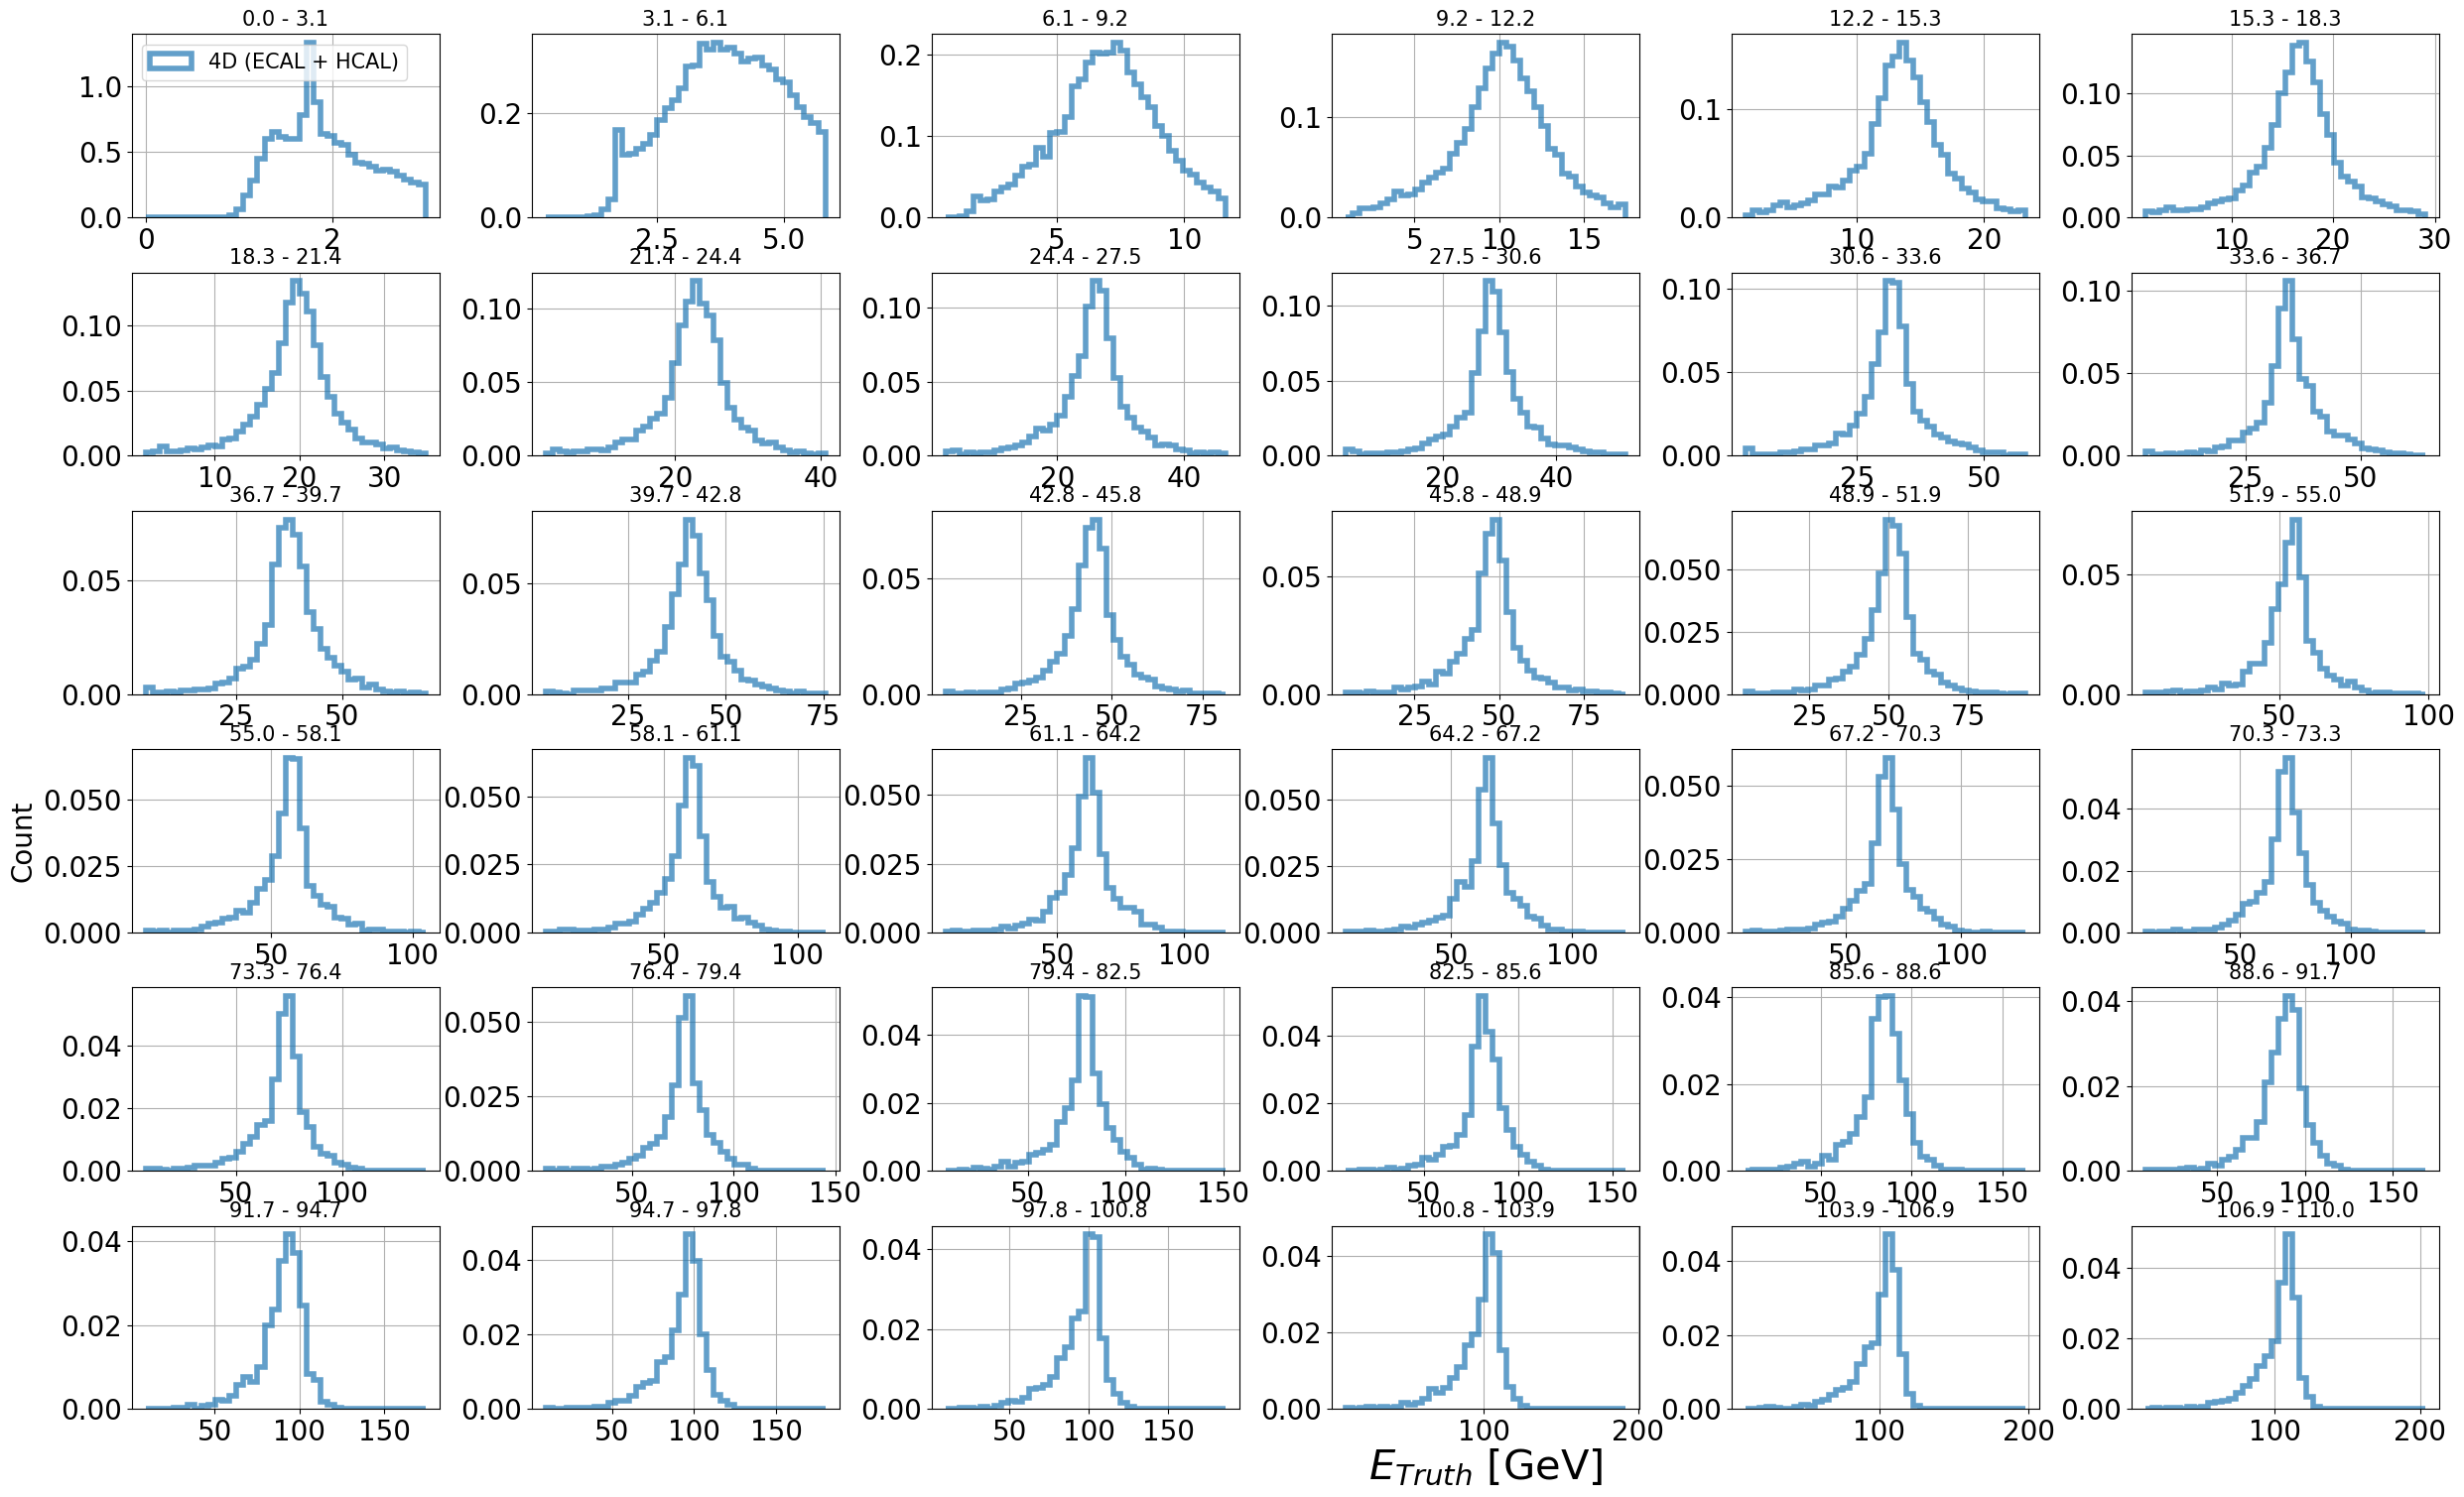

In [8]:
output_path='/home/bishnu/EIC/output_reg_dnn_straw/DeepSets'
#output_straw='/home/bishnu/EIC/output_reg_dnn_straw/strawman_fit_slices_Final'
#strawman_slices='/home/bishnu/EIC/output_reg_dnn_straw/strawman_fit_slices_Final/pred_straw_e-_hcal_continuous.csv'

#files_truth=[f'{output_path}/true_DeepSets_pi+_hcal_continuous_4D_L4_lre3_size64_cut.csv']
particle='pp'
detector='hcal'
labels=['4D (ECAL + HCAL)'  , 'strawman']#, '2D', '3D', '4D', 'strawman']      ## Input features
data_type='continuous'

files_pred_true=[f'{output_path}/Ecal_hcal_pred_DeepSets_{particle}_{detector}_with_label_correct_ecal_cut.csv',
                f'{output_path}/Ecal_hcal_pred_strawman_{particle}_{detector}.csv']

nbins=40
min_val=0
max_val=110
Nbins=37
binning=np.linspace(min_val, max_val, Nbins)

compare_energy_response_E_over_pred(files_pred_true, binning, data_type,particle,detector, 
                                    labels,ratio_E_pred=False, ylogscale=False)


## Study the ECAL and HCAL energy deposition

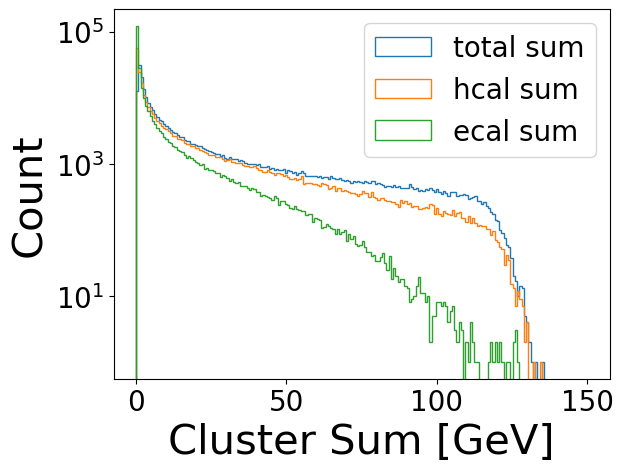

In [63]:
range=[0,150]
nbins=200
plt.hist(total_sum, histtype='step', label='total sum', bins=nbins, range=range)
plt.hist(hcal_sum, histtype='step', label='hcal sum',bins=nbins, range=range)
plt.hist(ecal_sum, histtype='step', label='ecal sum', bins=nbins, range=range)
plt.yscale('log')
plt.xlabel('Cluster Sum [GeV]', fontsize=30)
plt.ylabel('Count', fontsize=30)
plt.legend( fontsize=20)

In [87]:
print(len(gen_energy), '', len(total_sum))

85117  85117


Text(0, 0.5, 'Ecal energy [GeV]')

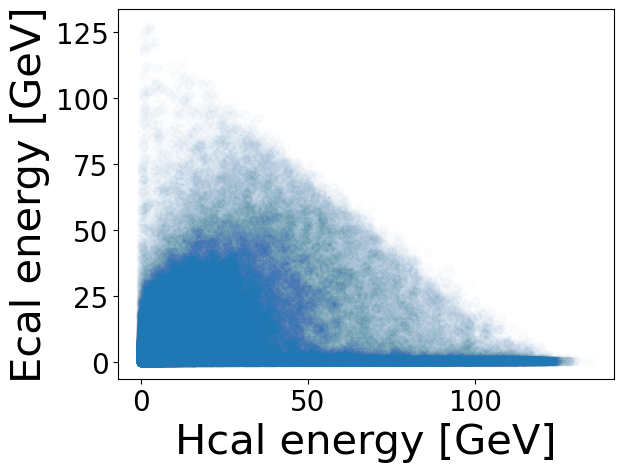

In [55]:
plt.scatter(hcal_sum,ecal_sum, alpha=0.01)
plt.xlabel('Hcal energy [GeV]', fontsize=30)
plt.ylabel('Ecal energy [GeV]', fontsize=30)

In [52]:
mask_clust=(total_sum>0) & (total_sum<150)
gen_energy_clust5=gen_energy[mask_clust]
total_sum_clust5=total_sum[mask_clust]

(0.0, 150.0)

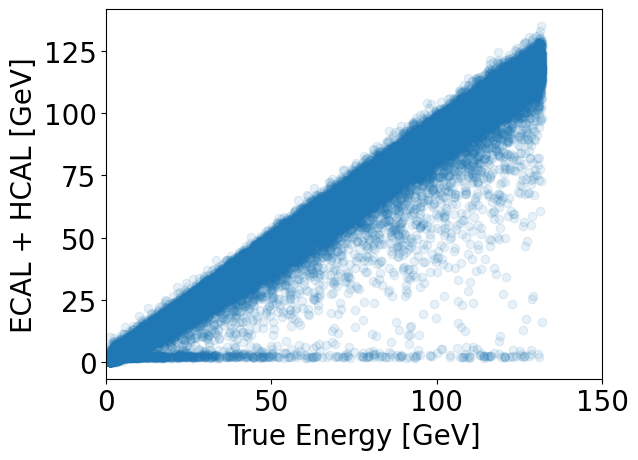

In [58]:
plt.scatter(gen_energy_clust5, total_sum_clust5, alpha=0.1)
plt.xlabel("True Energy [GeV]", fontsize=20)
plt.ylabel("ECAL + HCAL [GeV]", fontsize=20)
plt.xlim(0,150)

## Study the fraction of ecal and hcal energy distribution

In [24]:
mask=total_sum>0
ecal_sum=ecal_sum[mask]
hcal_sum=hcal_sum[mask]
total_sum=total_sum[mask]
ecal_frac=np.divide(ecal_sum, total_sum)
hcal_frac=np.divide(hcal_sum, total_sum)

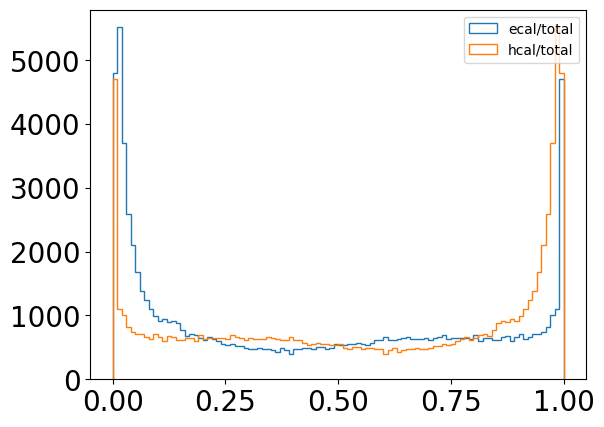

In [31]:
plt.hist(ecal_frac, bins=100 , histtype='step', label='ecal/total')
plt.hist(hcal_frac, bins=100 , histtype='step', label='hcal/total')
plt.legend()
plt.xlabel('cal energy / total (reconstructed energy)')

In [142]:
## Number ECAL infront of HCAL 
straw_energy_pp_hcal_ecal_continuous=np. array([  1.843114,   4.412994,   7.539625,  10.650783,  13.668939,
        16.761621,  19.83345 ,  22.894109,  25.934883,  29.00557 ,
        32.06122 ,  35.136108,  38.188537,  41.220917,  44.31665 ,
        47.346869,  50.38347 ,  53.441561,  56.49497 ,  59.607497,
        62.617416,  65.648747,  68.694948,  71.837594,  74.856798,
        77.909754,  81.029511,  84.035329,  87.113686,  90.17729 ,
        93.115906,  96.22827 ,  99.307333, 102.34782 , 105.401875,
       108.50562 ])


straw_res_cor_pp_hcal_ecal_continuous=np. array([0.399943, 0.276331, 0.192665, 0.157539, 0.139036, 0.129065,
       0.116442, 0.117866, 0.110939, 0.111768, 0.107415, 0.099132,
       0.104176, 0.100392, 0.099521, 0.097925, 0.104945, 0.096553,
       0.095776, 0.089299, 0.095069, 0.083166, 0.089666, 0.090954,
       0.078831, 0.098947, 0.096974, 0.085807, 0.095951, 0.096254,
       0.099877, 0.082969, 0.087509, 0.087452, 0.087268, 0.102258])

straw_scale_median_pp_hcal_ecal_continuous=np. array([0.836651, 0.840865, 0.864403, 0.874527, 0.878995, 0.882298,
       0.886411, 0.890391, 0.891755, 0.892464, 0.895188, 0.896309,
       0.898751, 0.89937 , 0.901555, 0.90277 , 0.904136, 0.905468,
       0.906622, 0.906258, 0.910158, 0.910662, 0.911223, 0.91204 ,
       0.913555, 0.914802, 0.912353, 0.915999, 0.915954, 0.915324,
       0.914046, 0.916703, 0.915572, 0.914405, 0.917101, 0.916008])

## Number without the ECAL into it

straw36_energy_pp_hcal_continuous=np. array([  1.876197,   4.538017,   7.759849,  10.925549,  14.069943,
        17.244653,  20.398947,  23.534799,  26.689243,  29.853447,
        32.990277,  36.121584,  39.271817,  42.38815 ,  45.546009,
        48.675166,  51.858227,  54.99398 ,  58.143045,  61.264593,
        64.412031,  67.54589 ,  70.693471,  73.834669,  77.015546,
        80.11661 ,  83.294853,  86.385287,  89.555096,  92.731286,
        95.887834,  98.996312, 102.139038, 105.267707, 108.436743,
       120.598693])
straw36_res_sigma_pp_hcal_continuous=np. array([0.515607, 0.349758, 0.208681, 0.165552, 0.139582, 0.123115,
       0.11417 , 0.103958, 0.098499, 0.093692, 0.08878 , 0.086155,
       0.081574, 0.078998, 0.075856, 0.072378, 0.070153, 0.070946,
       0.065787, 0.066309, 0.066302, 0.065511, 0.06192 , 0.061313,
       0.061157, 0.059155, 0.057277, 0.056331, 0.056794, 0.052894,
       0.053245, 0.053681, 0.052053, 0.050736, 0.05325 , 0.080176])

straw36_scale_median_pp_hcal_continuous=np. array([0.728807, 0.780535, 0.833097, 0.848435, 0.856134, 0.863103,
       0.867999, 0.873522, 0.876693, 0.877808, 0.884215, 0.88561 ,
       0.888558, 0.890088, 0.892949, 0.892567, 0.896266, 0.896047,
       0.898974, 0.899585, 0.901041, 0.903163, 0.903885, 0.903712,
       0.906595, 0.905685, 0.905775, 0.907601, 0.907833, 0.90906 ,
       0.909419, 0.908851, 0.907472, 0.908665, 0.910615, 0.906736])

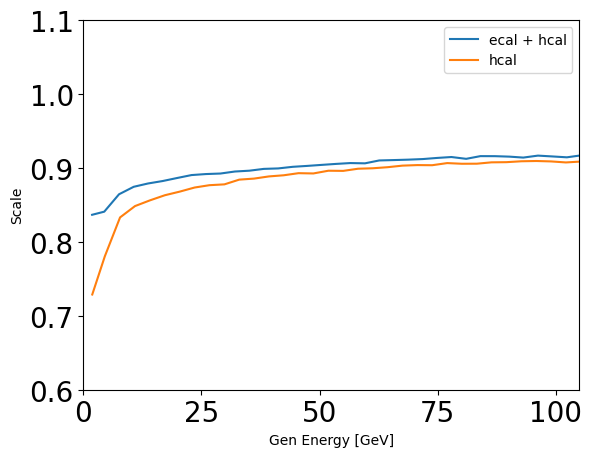

In [143]:
plt.errorbar(straw_energy_pp_hcal_ecal_continuous, straw_scale_median_pp_hcal_ecal_continuous, label='ecal + hcal')
plt.errorbar(straw36_energy_pp_hcal_continuous, straw36_scale_median_pp_hcal_continuous, label= 'hcal')
plt.ylabel('Scale')
plt.xlabel('Gen Energy [GeV]')
plt.xlim(0,105)
plt.ylim(0.6,1.1)
plt.legend()

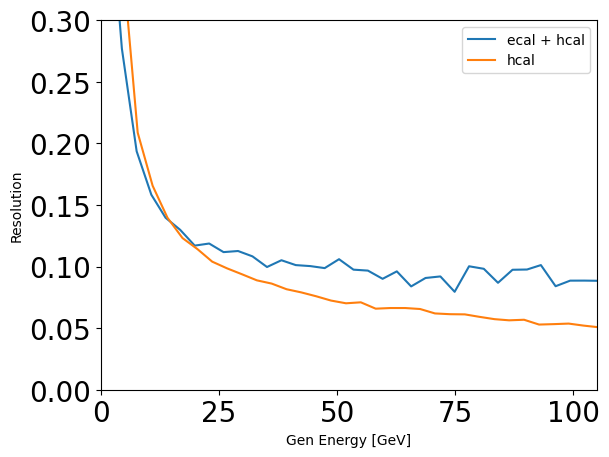

In [144]:
plt.errorbar(straw_energy_pp_hcal_ecal_continuous, straw_res_fit_pp_hcal_ecal_continuous, label='ecal + hcal')
plt.errorbar(straw36_energy_pp_hcal_continuous, straw36_res_sigma_pp_hcal_continuous, label= 'hcal')
plt.ylabel('Resolution')
plt.xlabel('Gen Energy [GeV]')
plt.xlim(0,105)
plt.ylim(0,0.3)
plt.legend()


## MIP
/media/miguel/Elements/Data_hcali/Data1/log10_Uniform_03-23/log10_pi+_100_10k_17deg_ECAL_1/    

In [69]:
def get_hitE_genE_fromChain_local(detector, particle, start, stop):
    hit_e_arr=[]
    MIP_TH=0
    gen_energy_arr=[]
    if detector=="hcal":
        detector_name = "HcalEndcapPHitsReco"
        sampling_fraction=0.0224 
        Mev_to_GeV=1

    elif detector=="hcal_insert":
        detector_name= "HcalEndcapPInsertHitsReco"
        sampling_fraction=0.0089
        Mev_to_GeV=1

    elif detector =='ecal':
        detector_name= "EcalEndcapPHitsReco"
        sampling_fraction=1.
        Mev_to_GeV=1 #33.33
    else:
        print("Please make sure you have picked right detector name")     
        print("Pick: hcal or hcal_insert for endcap calo/ hcal_insert for insert")
        
    '''    
    conditions = {
    ('ecal', 'mu-'): '/media/miguel/Elements/Data_hcali/Data1/log10_Uniform_03-23/log10_20GeV_mu-_Ecal_Only_10_5k_17deg/',
    ('ecal', 'e-'): '/media/miguel/Elements/Data_hcali/Data1/log10_Uniform_03-23/log10_20GeV_e-_Ecal_Only_20_5k_17deg/',
    ('hcal', 'mu-'): '/media/miguel/Elements/Data_hcali/Data1/log10_Uniform_03-23/log10_20GeV_mu-_Hcal_Only_10_5k_17deg/',
    ('hcal', 'e-'): '/media/miguel/Elements/Data_hcali/Data1/log10_Uniform_03-23/log10_20GeV_e-_Hcal_Only_20_5k_17deg/',
    # Add more conditions and corresponding file paths as needed
    }

    default_file = "default.txt"
    rootfile_dir = conditions.get((detector, particle), default_file)
    if rootfile_dir==default_file:
        print('File not found')    
    '''
    rootfile_dir='/media/miguel/Elements/Data_hcali/Data1/log10_Uniform_03-23/log10_pi+_100_10k_17deg_ECAL_1/'
    root_files_total = np.sort(glob.glob(rootfile_dir+'*root'))
    file_lists=root_files_total[start:stop]   
    
    
    #trees = [ur.open(file_list)["events"] for file_list in file_lists]  # Replace "tree_name" with the actual tree name
    #chain = ur.tree.concatenate(trees)
    #num_entries=chain.numentries
    #print(num_entries)
    
    for file_num in file_lists:
        #print(file_num)
        ur_tree=ur.open(file_num)['events']
        num_entries=ur_tree.numentries
        #print('Hello hello hello. ', num_entries)
        
        genPx = ur_tree.array('MCParticles.momentum.x')[:,2]
        
        genPy = ur_tree.array('MCParticles.momentum.y')[:,2]
        genPz = ur_tree.array('MCParticles.momentum.z')[:,2]
        mass = ur_tree.array("MCParticles.mass")[:,2]
        root_gen_P = np.sqrt(genPx*genPx + genPy*genPy + genPz*genPz)
        gen_energy=np.sqrt(root_gen_P**2 + mass**2)
        
        #theta = np.arccos(genPz/root_gen_P)*180/np.pi    
        
        hit_raw =ur_tree.array(f'{detector_name}.energy')/Mev_to_GeV
        
        time =ur_tree.array(f'{detector_name}.time')
        mask=(hit_raw>MIP_TH)  & (time<time_TH) & (hit_raw<1e10)
        hit_e=hit_raw[mask]
        print('MIP TH xxxxxxxx',MIP_TH)
        
        hit_e=hit_e.astype(float)
        hit_e=ak.flatten(hit_e)
        gen_energy_arr.append(gen_energy)
        hit_e_arr.append(hit_e)
        
        #PosRecoX_hcal = ur_tree.array(f'{detector_name}.position.x')/10.0
        #PosRecoY_hcal = ur_tree.array(f'{detector_name}.position.y')/10.0
        #PosRecoZ_hcal = ur_tree.array(f'{detector_name}.position.z')/10.0
    #hit_e_arr=np.(hit_e_arr)
    #hit_e_arr=np.array(hit_e_arr)
    
    gen_energy_arr=np.concatenate(gen_energy_arr)
    hit_e_arr=np.concatenate(hit_e_arr)
    gen_energy_arr = gen_energy_arr.astype(int)
    return hit_e_arr, gen_energy_arr

In [71]:
detector='ecal'
particle='mu-'
start=0
stop=5

hit_e_arr, gen_energy_arr=get_hitE_genE_fromChain_local(detector, particle, start, stop)

MIP TH xxxxxxxx 0
MIP TH xxxxxxxx 0
MIP TH xxxxxxxx 0
MIP TH xxxxxxxx 0
MIP TH xxxxxxxx 0


In [72]:
MIP_ecal=0.13*0.5
mask=hit_e_arr<MIP_ecal
mean=ak.mean(hit_e_arr[mask])
print(mean, ' log 10 ', np.log10(mean))

0.01342809272730348  log 10  -1.8719856684057663


In [51]:
print(0.13*0.5)

0.065


In [46]:
detector='hcal'
particle='mu-'
start=0
stop=1

hit_e_arr, gen_energy_arr=get_hitE_genE_fromChain_local(detector, particle, start, stop)
mean=ak.mean(hit_e_arr)
print(mean, ' log 10 ', np.log10(mean))

0.0013044799873854224  log 10  -2.8845625792197573


In [34]:
detector='hcal'
particle='mu-'
start=0
stop=5

hit_e_arr, gen_energy_arr=get_hitE_genE_fromChain(detector, particle, start, stop)

if(particle=='e-'):
    MIP_line=0.1
elif (particle=='mu-'):
    MIP_line=0.13
    
if detector=='ecal':
    min_xrange=0.0001
    max_xrange=0.5
    
elif detector=='hcal':
    min_xrange=0.0000
    max_xrange=0.5
    MIP_line=0.025
    
    

#print(type(hit_e_arr),'   ', len(hit_e_arr))
hit_e_arr_gev=np.divide(hit_e_arr,0.0224)

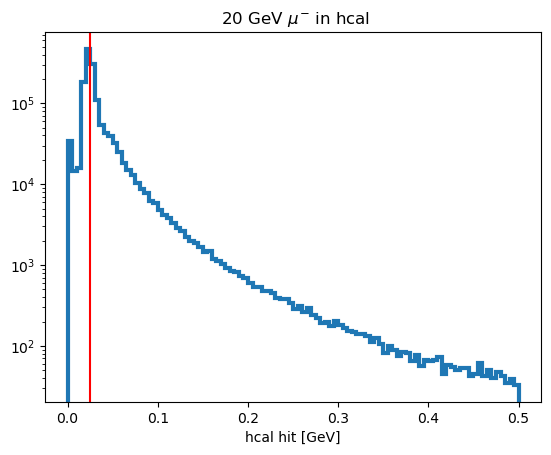

In [35]:
#plt.hist(hit_e_arr,bins=100, range=(min_xrange,max_xrange), histtype='step', linewidth=3)
plt.hist(hit_e_arr_gev,bins=100, range=(min_xrange,max_xrange), histtype='step', linewidth=3)
plt.axvline(MIP_line, color='r')
plt.xlabel(f"{detector} hit [GeV]")
greek_particle=get_greek_particle(particle)
plt.title(f' 20 GeV {greek_particle} in {detector}')
plt.yscale('log')
#plt.hist(gen_energy_arr)
#print(gen_energy_arr[0:100])

[20.00027756 20.00027833 20.00027909 20.00027985 20.00028061 20.00028138]


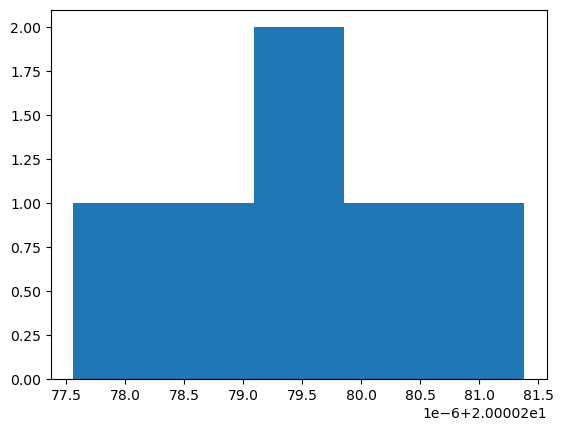

In [5]:
import os
output='/media/miguel/Elements/Data_hcali/Data1/log10_Uniform_03-23/log10_20GeV_e-_Ecal_Only_20_5k_17deg/'
stats_dir=os.path.realpath(output)
print(stats_dir)

/media/miguel/Elements/Data_hcali/Data1/log10_Uniform_03-23/log10_20GeV_e-_Ecal_Only_20_5k_17deg


In [63]:
np.log10(0.189)

-0.7235381958267558